## <b>This code performs several steps of feature engineering, including handling missing data, generate statistics, encoding categorical variables, and identifying duplicates.</b>

In [16]:
# Pandas library -> used for data manipulation and analysis.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [17]:
# Loading Data: Reads data from a CSV file.

df = pd.read_csv("data.csv")
df

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,M001,A,3.22,18.0,F22,male
1,F002,B,NaN,20.0,S22,female
2,F003,C,3.62,NaN,F23,female
3,M004,D,4.00,20.0,F23,male
4,M005,E,3.68,21.0,S23,male
5,F006,F,3.89,22.0,S23,female
6,AG007,Agent47,4.00,24.0,S01,male
7,AG007,Agent47,4.00,24.0,S01,male


In [18]:
# Understanding Data Shape: Checks the number of rows and columns.

df.shape

(8, 6)

In [19]:
# if there any Null value it will show True

df.isnull().values.any()

True

In [20]:
# Identifying Missing Values: Detects missing values in the dataset.

df.isnull()

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,False,False,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False


In [21]:
# Imputing Missing Values: Fills missing values with a specified value (0 in this case).
# Imputation: is the process of replacing missing data with substituted values.

impute_data = df.fillna(0)
impute_data
# mean_cgpa = df['CGPA'].mean()
# mean_age = df['Age'].mean()

# fillna with mean CGPA and mean Age
# df['CGPA'].fillna(mean_cgpa, inplace=True)   # impute_data = df.fillna(0)
# df['Age'].fillna(mean_age, inplace=True)
# df

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,M001,A,3.22,18.0,F22,male
1,F002,B,0.00,20.0,S22,female
2,F003,C,3.62,0.0,F23,female
3,M004,D,4.00,20.0,F23,male
4,M005,E,3.68,21.0,S23,male
5,F006,F,3.89,22.0,S23,female
6,AG007,Agent47,4.00,24.0,S01,male
7,AG007,Agent47,4.00,24.0,S01,male


In [22]:
# Descriptive Statistics: Provides summary statistics of the impute_data DataFrame,
# provides -> count, mean, std, min, max and percentiles(25%, 50%, 75%)

impute_data.describe()

,CGPA,Age
count,8.00000,8.000000
mean,3.30125,18.625000
std,1.36074,7.799954
min,0.00000,0.000000
25%,3.52000,19.500000
50%,3.78500,20.500000
75%,4.00000,22.500000
max,4.00000,24.000000


In [23]:
# Dropping Missing Values: Removes rows with any missing values.

delete_data = df.dropna(inplace=False)
delete_data

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,M001,A,3.22,18.0,F22,male
3,M004,D,4.00,20.0,F23,male
4,M005,E,3.68,21.0,S23,male
5,F006,F,3.89,22.0,S23,female
6,AG007,Agent47,4.00,24.0,S01,male
7,AG007,Agent47,4.00,24.0,S01,male


In [24]:
# Encoding Categorical Variables: Converts categorical data into numerical format using label encoding.
# Convert 'Gender' labels in the DataFrame (df) to numeric labels (0 or 1),

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,M001,A,3.22,18.0,F22,1
1,F002,B,NaN,20.0,S22,0
2,F003,C,3.62,NaN,F23,0
3,M004,D,4.00,20.0,F23,1
4,M005,E,3.68,21.0,S23,1
5,F006,F,3.89,22.0,S23,0
6,AG007,Agent47,4.00,24.0,S01,1
7,AG007,Agent47,4.00,24.0,S01,1


In [25]:
# One-Hot Encoding: Converts categorical data into binary columns using one-hot encoding.# resulting in a new DataFrame df1, and displays it.

df1 = pd.get_dummies(df, columns=['Gender'])
df1

,Student ID,Student Name,CGPA,Age,Semester,Gender_0,Gender_1
0,M001,A,3.22,18.0,F22,False,True
1,F002,B,NaN,20.0,S22,True,False
2,F003,C,3.62,NaN,F23,True,False
3,M004,D,4.00,20.0,F23,False,True
4,M005,E,3.68,21.0,S23,False,True
5,F006,F,3.89,22.0,S23,True,False
6,AG007,Agent47,4.00,24.0,S01,False,True
7,AG007,Agent47,4.00,24.0,S01,False,True


In [26]:
# Identifying Duplicates: Detects duplicate rows in the dataset.

duplicates = df[df.duplicated()]
print(duplicates)

  Student ID Student Name  CGPA   Age Semester  Gender
7      AG007      Agent47   4.0  24.0      S01       1


In [27]:
# Dropping Duplicates: Deletes duplicate rows from the dataset.

no_duplicates = df.drop_duplicates()
no_duplicates

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,M001,A,3.22,18.0,F22,1
1,F002,B,NaN,20.0,S22,0
2,F003,C,3.62,NaN,F23,0
3,M004,D,4.00,20.0,F23,1
4,M005,E,3.68,21.0,S23,1
5,F006,F,3.89,22.0,S23,0
6,AG007,Agent47,4.00,24.0,S01,1


In [28]:
# corr = df2.corr()
# corr

In [29]:
# plt.figure(figsize=(16,8))
# sns.heatmap(corr, annot=True, linewidths=0, vmin=1, cmap='Reds')
# plt.show()

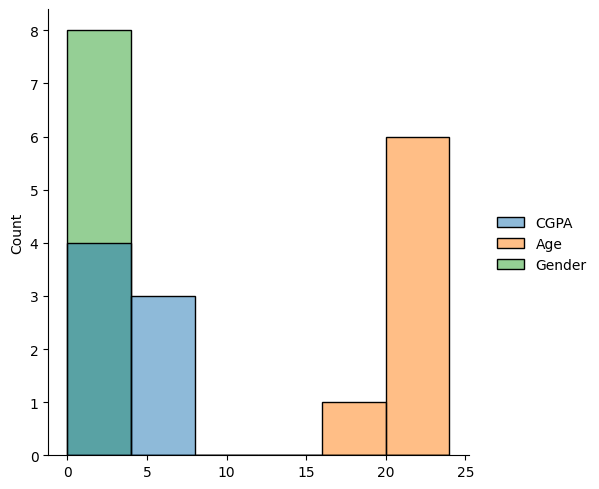

In [30]:
sns.displot(df)
plt.show()

## Summary of Feature Engineering Steps:

✔ Loading Data: Reads data from a CSV file.<br>
✔ Understanding Data Shape: Checks the number of rows and columns.<br>
✔ Identifying Missing Values: Detects missing values in the dataset.<br>
✔ Imputing Missing Values: Fills missing values with a specified value (0 in this case).<br>
✔ Dropping Missing Values: Removes rows with any missing values.<br>
✔ Descriptive Statistics: Provides summary statistics to understand data distribution.<br>
✔ Encoding Categorical Variables: Converts categorical data into numerical format using label encoding.<br>
✔ One-Hot Encoding: Converts categorical data into binary columns using one-hot encoding.<br>
✔ Identifying Duplicates: Detects duplicate rows in the dataset.<br>
✔ Dropping Duplicates: Deletes duplicate rows from the dataset.<br>

##### Each of these steps is a part of the feature engineering process, which aims to prepare and transform raw data into a suitable format for modeling.